In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
dataset = pd.read_csv("HousingData.csv")
dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


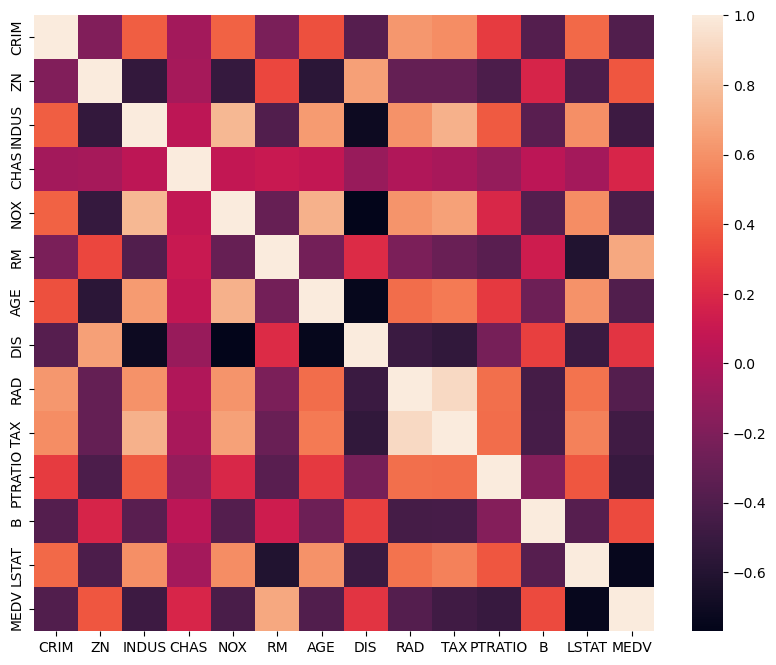

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(data=dataset.corr()) #),annot=True)
plt.show()

In [56]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [58]:
dataset.fillna(0, inplace=True)  # Fill all missing values with 0


In [60]:
x=dataset.iloc[:,:-1]
y=dataset["MEDV"]

In [62]:
ss = StandardScaler()
ss.fit(x)
x=pd.DataFrame(ss.transform(x),columns=x.columns)

In [64]:
x.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.404235,0.314369,-1.185361,-0.268391,-0.144217,0.413672,-0.020015,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-0.973338
1,-0.401785,-0.468160,-0.508491,-0.268391,-0.740262,0.194274,0.429306,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.413519
2,-0.401787,-0.468160,-0.508491,-0.268391,-0.740262,1.282714,-0.154484,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.101181


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [103]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

# Linear Regression

In [70]:
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [76]:
lr.score(x_test,y_test)*100

64.64153977582289

In [107]:
y_pred=lr.predict(x_test)

In [109]:
mean_squared_error(y_test,y_pred)

25.929696549627085

In [113]:
mean_absolute_error(y_test,y_pred)

3.2140386828285985

In [115]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.09212102660837

In [80]:
lr.coef_

array([-1.00766269,  0.68054968, -0.19014067,  0.83006044, -1.97586381,
        3.44032775, -0.68010942, -3.20088396,  1.90446455, -1.55048724,
       -2.02397257,  1.1096342 , -2.78682207])

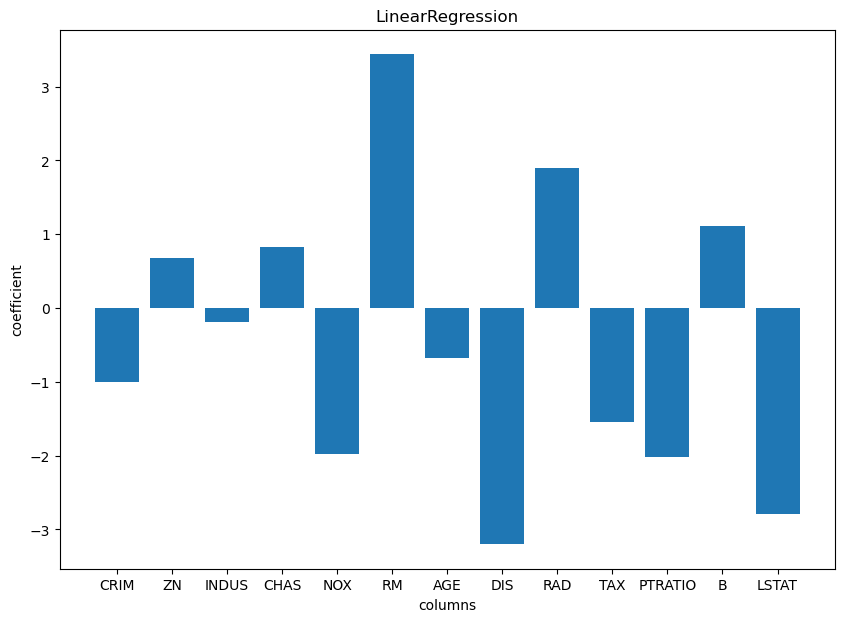

In [84]:
plt.figure(figsize=(10,7))
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coefficient")
plt.show()

# Lasso

In [88]:
la = Lasso(alpha=0.5)
la.fit(x_train,y_train)
la.score(x_test,y_test)

0.6129700568313866

In [117]:
y_pred=la.predict(x_test)

In [119]:
mean_squared_error(y_test,y_pred)

28.38236992887921

In [121]:
mean_absolute_error(y_test,y_pred)

3.2934286331187406

In [123]:
np.sqrt(mean_squared_error(y_test,y_pred))


5.327510669053532

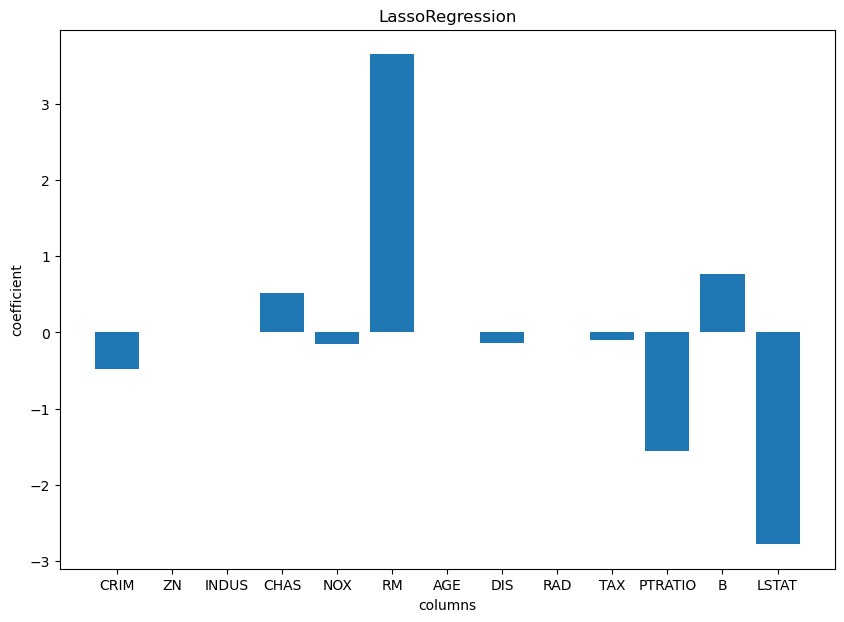

In [90]:
plt.figure(figsize=(10,7))
plt.bar(x.columns,la.coef_)
plt.title("LassoRegression")
plt.xlabel("columns")
plt.ylabel("coefficient")
plt.show()

# Ridge

In [97]:
re = Ridge(alpha=0.5)
re.fit(x_train,y_train)
re.score(x_test,y_test)

0.6463860961051928

In [125]:
y_pred=re.predict(x_test)
mean_squared_error(y_test,y_pred)

25.931845350697074

In [127]:
mean_absolute_error(y_test,y_pred)

3.2129766080560147

In [129]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.092332014970849

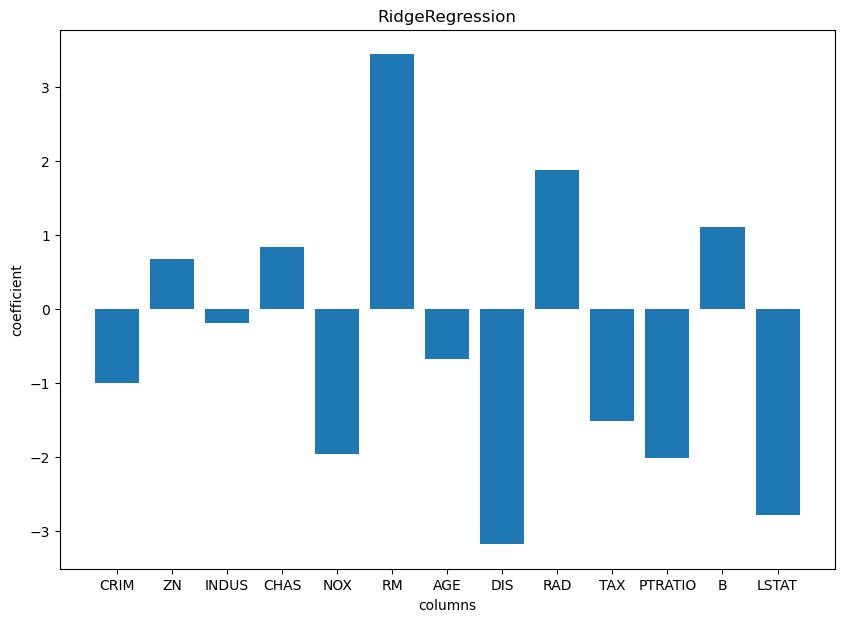

In [99]:
plt.figure(figsize=(10,7))
plt.bar(x.columns,re.coef_)
plt.title("RidgeRegression")
plt.xlabel("columns")
plt.ylabel("coefficient")
plt.show()